In [1]:
import qcodes as qc
from fidelity_helpers import *

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The model implemented in fidelity_helpers follows Barthel et al. DOI: 10.1103/PhysRevLett.103.160503 

In [11]:
signal=1.
noise=0.2
V=np.linspace(-2*signal, 2*signal, 10000)
nS, nT = probST(V, signal, noise, 100e-6, t1=500e-6)

In [12]:
fm=optimizeVt(-0.5,0.5,100, signal, noise, 100e-6, t1=500e-6)

In [18]:
fm[1] # optimal threshold

-0.075757575757575746

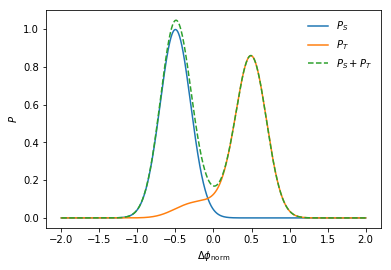

In [19]:
plt.plot(V, nS, label='$P_S$')
plt.plot(V, nT, label='$P_T$')
plt.plot(V, nS+nT, label='$P_S + P_T$', ls='--')
plt.ylabel('$P$')
plt.xlabel('$\Delta\phi_\mathrm{norm}$')
plt.legend(frameon=False)

In [3]:
tmin=1e-6#us
signal=1
tau=np.logspace(-7, -1, 200)
trelax=10e-3
noise=np.sqrt(tmin/tau)

In [4]:
fidel1 = np.array([fidelity(0, 1, np.sqrt(tmin/elem), elem, t1=trelax) for elem in tau])

Text(0.5, 0, '$t_\\mathrm{int}$ (μs)')

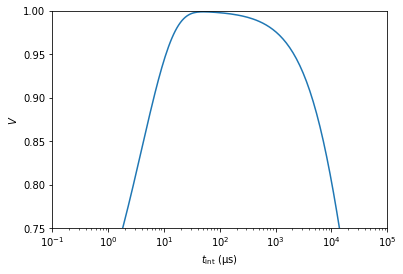

In [10]:
plt.figure()
plt.semilogx(tau*1e6, -1+np.sum(fidel1, axis=1), label='1us, 10ms')
plt.ylim(0.75,1.0)
plt.xlim(0.1,1e5)
plt.ylabel('$V$')
plt.xlabel('$t_\mathrm{int}$ (μs)')